This is the first half of the module 4 assignment. The full module 4 assignment will be due on Monday, March 14 at 11:59 pm ET.  To submit your work, please download this document as an html file and upload that to Canvas. 

0. List the names of your group members, as well as any other class members you conferred with for this assignment.

Rafael Piloto, Nathaniel Lechtzin, Leo Lin, Zee Kwong

1. We discussed fitting models to data using the least squares regression. The Python function ```lstsqr``` within the linalg submodule of numpy that will perform model fits to data using least squares regression.  In this question, you will explore the details of fitting polynomial models to data.

(a) We discussed fitting a linear function to a data set in class, and wrote out the matrix equation that corresponds to a linear function with two fit parameters.  Assume now that you have a data set with $4$ points: $(x_1,y_1)$, $(x_2,y_2)$, $(x_3,y_3)$, $(x_4,y_4)$, and that the best-fit model is of the form: $y = ax^2+bx+c$. Write the corresponding matrix equation, in the form of $\vec{y} = A \vec{m}$.

$\begin{bmatrix}
y1 \\
y2 \\
y3 \\
y4 \\
\end{bmatrix} = \begin{bmatrix}
x1 & 1 \\
x2 & 1 \\ 
x3 & 1 \\
x4 & 1 \\
\end{bmatrix} \begin{bmatrix}
a \\
b \\ 
c \\
\end{bmatrix}$

(b) Using the answer to the (a) as a guide, write down a more generalized form of this matrix equation that assumes you have $n$ data points and want to fit a $k^{th}$ order polynomial to your data.

$\begin{bmatrix}
f(1) \\
f(2) \\
... \\
f(n) \\
\end{bmatrix} = \begin{bmatrix}
1 & 1 \\
2 & 1 \\ 
... & 1 \\
n & 1 \\
\end{bmatrix} \begin{bmatrix}
m_1 \\
m_2 \\ 
... \\
m_k \\
\end{bmatrix}$

(c) Write a function that uses ```lstsq``` to fit a polynomial of any order $k$ to an arbitrary data set. Your function should take in $x$ and $y$ values for a data set and a specified polynomial order, $k$. Your function should return an array of all fit parameter values.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def fit(x, y, k):
  A = np.vstack([x ** p for p in range(k + 1)]).T
  return np.linalg.lstsq(A, y, rcond=None)[0]

In [8]:
x = np.linspace(1, 2, 5)
A = np.vstack([x ** p for p in range(3 + 1)]).T
print(A)

kvals = np.linspace(1, 2, 5)
A = np.zeros([len(x),3+1])
for i in range(3+1):
  A[:,i] = x.T**kvals[i]
print(A.T)

[[1.       1.       1.       1.      ]
 [1.       1.25     1.5625   1.953125]
 [1.       1.5      2.25     3.375   ]
 [1.       1.75     3.0625   5.359375]
 [1.       2.       4.       8.      ]]
[[1.         1.25       1.5        1.75       2.        ]
 [1.         1.32171408 1.66002288 2.0127858  2.37841423]
 [1.         1.39754249 1.83711731 2.3150324  2.82842712]
 [1.         1.47772126 2.03310451 2.66266534 3.36358566]]


(d) Test your function. Create some data for x-values in the range $[-10,10]$ using the equation $y = 5x^2+3x+2$. Using the procedure we discussed in class, add some noise to your data, with a noise amplitude of $50$. Fit your data using your function from part (c). Plot your data and the resulting fit. Be sure to include labels for full credit.

[-4.07742672  3.58385216  5.10951597]


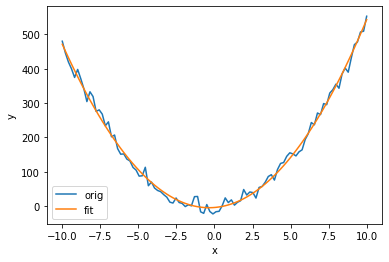

In [ ]:
def f(x, a=5, b=3, c=2):
  y = (a * (x ** 2)) + (b * x) + c
  return y

x = np.linspace(-10, 10, 100)
noise_amp = 50
noise = noise_amp * (np.random.rand(len(x))-0.5)
y = f(x) + noise

coeff = fit(x, y, 2)
print(coeff)
p_y = f(x, coeff[2], coeff[1], coeff[0])

fig, ax = plt.subplots(1, 1)
ax.plot(x, y, label="orig")
ax.plot(x, p_y, label="fit")

ax.set(xlabel="x", ylabel="y")

plt.legend()
plt.show()

(e) Write a function that will evaluate your polynomial fit at x-values you input.  Your function should take in the parameter array that is output from your polynomial fit function and an array of x-values. Your function should output an array of y-values associated with the fit. Recreate the plot from the previous question using your new function to confirm that it's working properly.

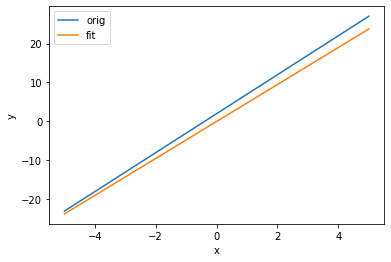

In [ ]:
def evaluate_y(coeff, x):
  y = 0
  for i in range(len(coeff) - 1, 0, -1):
    y += coeff[i] * (x ** i)
  return y

fig, ax = plt.subplots(1, 1)
ax.plot(x, y, label="orig")
ax.plot(x, [evaluate_y(coeff, i) for i in x], label="fit")

ax.set(xlabel="x", ylabel="y")

plt.legend()
plt.show()

2. Now that you can quickly fit data and plot the results, this question will explore polynomial fits of different degrees.

(a) Let's say we have a linear data set with some noise.  To mimic this, create a noisy data set. Use $10$ x-values in the range $[-5,5]$, and use the equation $y=5x+2$. Add noise with an amplitude of $10$. Plot the data points.

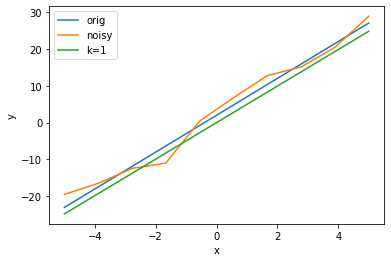

In [ ]:
x = np.linspace(-5, 5, 10)
noise_amp = 10
noise = noise_amp * (np.random.rand(len(x))-0.5)
ny = f(x, 0, 5, 2) + noise
y = f(x, 0, 5, 2)

coeff = fit(x, ny, 1)

fig, ax = plt.subplots(1, 1)

ax.plot(x, y, label="orig")
ax.plot(x, ny, label="noisy")
ax.plot(x, [evaluate_y(coeff, i) for i in x], label="k=1")

ax.set(xlabel="x", ylabel="y")

plt.legend()
plt.show()

(b) Use your polynomial fitting function to fit polynomials of orders $1,2,5,10$ to your data set. Use your polynomial evaluation function to evaluate each fit over a larger and more finely spaced array of x-values, say $1000$ points in the range $[-8,8]$. Plot your original data points along with these fit evaluations, and include a legend. Restrict the y-range of your plot so that you can clearly see how the fits compare to the data points and to each other.

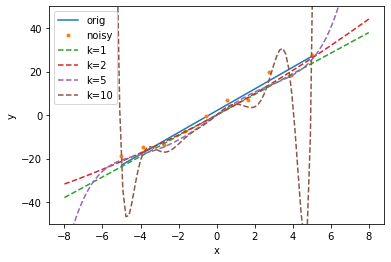

In [ ]:
x2 = np.linspace(-8, 8, 100)

one = fit(x, ny, 1)
two = fit(x, ny, 2)
five = fit(x, ny, 5)
ten = fit(x, ny, 10)

fig, ax = plt.subplots(1, 1)

ax.plot(x, y, label="orig")
ax.plot(x, ny, ".", label="noisy")
ax.plot(x2, [evaluate_y(one, i) for i in x2], "--", label="k=1")
ax.plot(x2, [evaluate_y(two, i) for i in x2], "--", label="k=2")
ax.plot(x2, [evaluate_y(five, i) for i in x2], "--", label="k=5")
ax.plot(x2, [evaluate_y(ten, i) for i in x2], "--", label="k=10")

ax.set(xlabel="x", ylabel="y", ylim=(-50, 50))

plt.legend()
plt.show()

(c) Discuss the fit results from (b). How do the fits change, relative to the data points, as the order of the fit is increased? What about the behavior between the data points, and beyond the range of the original data?  If we didn't know the underlying function that generate this data, discuss how you might evaluate whether each fit is a reasonable or unreasonable fit. 

> As the polynomial order of the fit increases, the fit becomes more unstable relative to the points. Between datapoints and beyond the data range, we can see that higher ordered fits extrapolate values and are inaccurate. If we didn't know the underlying function that caused these data points, it would be important to note the initial trend of the values. If the inital trend appears to be linear, it would be unwise to choose a higher ordered polynomial fit, which would extrapolate to clearly inaccurate values. A more reasonable fit would be the lowest polynomial ordered fit that best matches the trend of the intial data.